In [1]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16)
pipe = pipe.to("cuda")


/home/cvlab12/anaconda3/envs/headhunter/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 9/9 [00:01<00:00,  4.87it/s]


In [ ]:
perturb_method = "attention_identity" # or "uniform"
interpolation_scale = 0.5
perturb_type = f"[PROB_PERTURB]{perturb_method}@scale={interpolation_scale}"
perturb_heads = [ (9, i) for i in range(24)]

prompt = "a photo of a dog"
NUM_INFERENCE_STEPS = 20
GUIDANCE_SCALE = 3.0
images = pipe(
    prompt,
    num_inference_steps=NUM_INFERENCE_STEPS,
    guidance_scale=0.0,
    generator=torch.Generator('cpu').manual_seed(0),
    return_dict=False,
    perturb_heads=perturb_heads,
    perturb_type=perturb_type,
    perturb_guidance_scale=GUIDANCE_SCALE,
)[0][0]

100%|██████████| 20/20 [00:05<00:00,  3.62it/s]


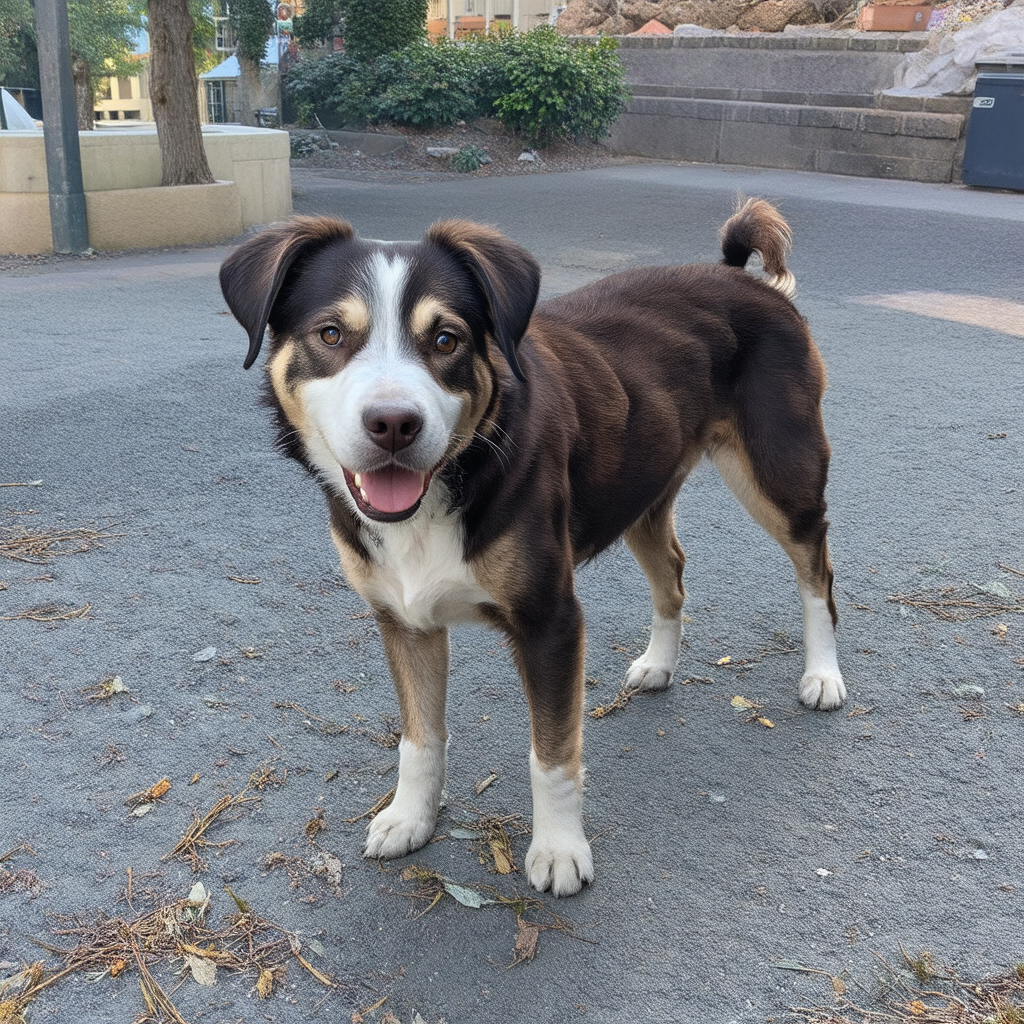

In [24]:
images